In [1]:
import os, glob
import pandas as pd
from nltk.tokenize import word_tokenize
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import dataframe_image as dfi



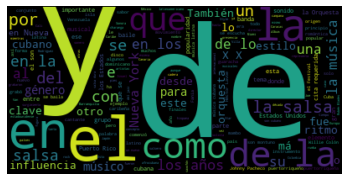

In [2]:
path='/home/valentina/SOFKA/muestra/'
folder_path = '/home/valentina/SOFKA/raw_texts'
file_list = glob.glob(folder_path + "/*.txt")
main_dataframe = pd.DataFrame(pd.read_table(file_list[0]))
  
#Getting wordcloud of the sample
for i in file_list:
    file = open(i, 'rt')
    text = file.read()
    words_list= re.compile(r'\w+').findall(text)
    #10% Sample
    perc_10=int((len(words_list)*0.1))
    sample=words_list[:perc_10]
    #wordcloud
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(path + str(re.compile(r'(\w+).txt').findall(i)))
    
    
    


In [4]:
#Getting stats info
for i in file_list:
    file = open(i, 'rt')
    text = file.read()
    words_list= re.compile(r'\w+').findall(text)
    perc_10=int((len(words_list)*0.1))
    sample=words_list[:perc_10]
    df=pd.DataFrame(sample, columns=['Words'])
    df['Length']=df['Words'].str.len()
    # Getting some information about the words
    #Count consonants
    def countConsonants(string):
        num_consonants = 0
        # to count the consonants
        for char in string:
            if char not in "aeiouAEIOU ":
                num_consonants += 1
        return num_consonants

    #Count vocals
    def countVocals(string):
        num_vocals = 0
        # to count the consonants
        for char in string:
            if char in "aeiouAEIOU ":
                num_vocals += 1
        return num_vocals


    df['Length']=df['Words'].str.len()
    df['Consonants'] = df['Words'].apply(countConsonants)
    df['Vocals'] = df['Words'].apply(countVocals)

    df_info= df.describe()


    #Getting de mode
    df_mode= df[['Length', 'Vocals', 'Consonants']].mode()

    #Incluiding perc90
    df_perc_90=pd.DataFrame(df.quantile(0.9)).T
    

    #Concatinating statistics info
    df_stat= pd.concat([df_info, df_mode,df_perc_90], axis=0).rename(
        index={0: 'mode',0.9: '90%'}).reindex(
            ['count', 'mean', 'std', 'mode', 'min', '25%', '50%', '75%', '90%', 'max'])

    dfi.export(df_stat,'/home/valentina/SOFKA/muestra/'+str(re.compile(r'(\w+).txt').findall(i)))
    
    
    